In [23]:
# print out all the fasta files in the this file /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/success_mab_fastas/*
import os
import sys
import glob

# output them all in the following format to a master file
# >filename_VL
# sequence
# >filename_VH
# sequence

output_file = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_biophi_success_mabs.fasta"
# clear the file
os.remove(output_file)
for file in glob.glob("/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/success_mab_fastas/*"):
    with open(file, 'r') as f:
        lines = f.readlines()
    with open(output_file, 'a') as f:
        # replace __ with -
        file = file.replace("__", "-")

        f.write(">" + os.path.basename(file).split(".")[0] + "_VL\n")
        f.write(lines[1])
        f.write(">" + os.path.basename(file).split(".")[0] + "_VH\n")
        f.write(lines[3])
        f.write("\n")
        f.close()

In [24]:
# Biophi run example using output_file
#   OASis evaluates antibody humanness by searching all overlapping 9-mers in
#   repertoires of more than 500 human subjects from the Observed Antibody Space
#   database

#   EXAMPLES:

#           # Evaluate humanness from FASTA file(s), save OASis humanness report to directory
#           biophi oasis input.fa --output ./report.xlsx \
#             --oasis-db sqlite:////Absolute/path/to/oas_human_subject_9mers_2019_11.db

#   INPUTS: Input FASTA file path(s)

print(f"biophi oasis {output_file} --scheme imgt --cdr-definition imgt --output /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/oasis_report_success.xlsx --oasis-db /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/BioPhi/OASis_9mers_v1.db")

biophi oasis /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_biophi_success_mabs.fasta --scheme imgt --cdr-definition imgt --output /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/oasis_report_success.xlsx --oasis-db /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/BioPhi/OASis_9mers_v1.db


In [22]:
# do the same for the antibodyfastas
output_file = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_biophi_antibodysall.fasta"
# remove the file before writitng
os.remove(output_file)
for file in glob.glob("/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/antibodyfastas/*"):
    with open(file, 'r') as f:
        lines = f.readlines()
    with open(output_file, 'a') as f:
        # replace __ with -
        file = file.replace("__", "-")

        f.write(">" + os.path.basename(file).split(".")[0] + "_VL\n")
        f.write(lines[1])
        f.write(">" + os.path.basename(file).split(".")[0] + "_VH\n")
        f.write(lines[3])
        f.write("\n")
        f.close()



In [15]:
print(f"biophi oasis {output_file} --scheme imgt --cdr-definition imgt --output /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/oasis_report_antibodysall.xlsx --oasis-db /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/BioPhi/OASis_9mers_v1.db")

biophi oasis /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_biophi_antibodysall.fasta --scheme imgt --cdr-definition imgt --output /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/oasis_report_antibodysall.xlsx --oasis-db /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/BioPhi/OASis_9mers_v1.db


In [25]:
# read in both of the reports and add a column for "success" and "scramble" then append them
import pandas as pd

success_report = pd.read_excel("/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/oasis_report_success.xlsx")
success_report["Type"] = "Success"
scramble_report = pd.read_excel("/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/oasis_report_antibodysall.xlsx")
scramble_report["Type"] = "Scramble"
# append the two dataframes
combined_report = success_report.append(scramble_report)
combined_report 

<ipython-input-25-1e79da3fe708>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_report = success_report.append(scramble_report)


,Antibody,Threshold,OASis Percentile,OASis Identity,Germline Content,Heavy V Germline,Heavy J Germline,Heavy OASis Percentile,Heavy OASis Identity,Heavy Non-human peptides,Heavy Germline Content,Light V Germline,Light J Germline,Light OASis Percentile,Light OASis Identity,Light Non-human peptides,Light Germline Content,Type
0,102-13,relaxed,0.154654,0.677570,0.734783,IGHV3-23*03,IGHJ4*01,0.445000,0.750000,"(28,)",0.750000,IGKV7-3*01,IGKJ2*01,0.068020,0.598039,41,0.718182,Success
1,104-15,relaxed,0.012000,0.459716,0.647577,IGHV1-69-2*01,IGHJ4*01,0.027000,0.392857,"(68,)",0.616667,IGKV1-16*01,IGKJ2*01,0.043000,0.535354,46,0.682243,Success
2,105-16,relaxed,0.004000,0.383886,0.638767,IGHV1-3*01,IGHJ4*01,0.013714,0.357143,"(72,)",0.591667,IGKV1-16*01,IGKJ2*01,0.014828,0.414141,58,0.691589,Success
3,109-20,relaxed,0.048611,0.516588,0.704846,IGHV1-3*01,IGHJ1*01,0.013000,0.345794,"(70,)",0.626087,IGKV2-30*01,IGKJ4*01,0.173385,0.692308,32,0.785714,Success
4,1140-1053,relaxed,0.031233,0.479452,0.710638,IGHV1-69-2*01,IGHJ6*01,0.033404,0.403509,"(68,)",0.647541,IGKV4-1*01,IGKJ2*01,0.059190,0.561905,46,0.778761,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,9961-9865,relaxed,0.011550,0.445498,0.687225,IGHV7-4-1*02,IGHJ4*01,0.064364,0.472727,"(58,)",0.720339,IGLV7-46*01,IGLJ3*02,0.015168,0.415842,59,0.651376,Scramble
1496,9968-2304,relaxed,0.004000,0.406417,0.635468,IGHV3-49*04,IGHJ6*01,0.089364,0.554545,"(49,)",0.669492,IGKV6-21*01,IGKJ1*01,0.000000,0.194805,62,0.588235,Scramble
1497,9973-5998,relaxed,0.004000,0.377990,0.657778,IGHV1-69-2*01,IGHJ4*01,0.013000,0.342593,"(71,)",0.663793,IGLV7-46*01,IGLJ2*01,0.015168,0.415842,59,0.651376,Scramble
1498,9974-7844,relaxed,0.004000,0.339713,0.635556,IGHV1-69-2*01,IGHJ4*01,0.009865,0.324324,"(75,)",0.613445,IGKV6-21*01,IGKJ4*01,0.005000,0.357143,63,0.660377,Scramble


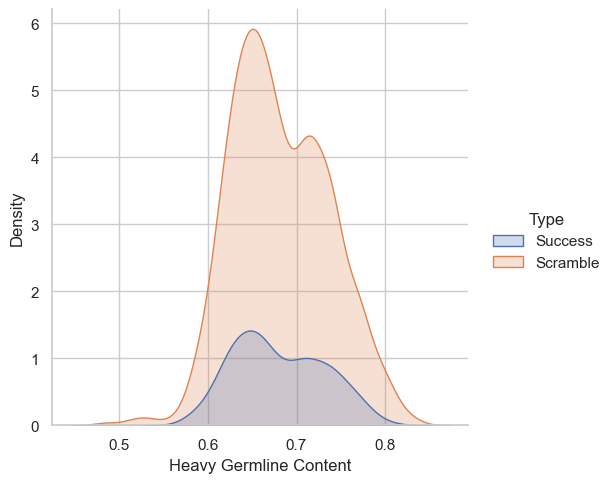

In [26]:
# compare the Heavy Germline Content and Light Germline Content using seaborn distplot and color by the type
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
g = sns.displot(combined_report, x="Heavy Germline Content", hue="Type", kind="kde", fill=True)
plt.show()


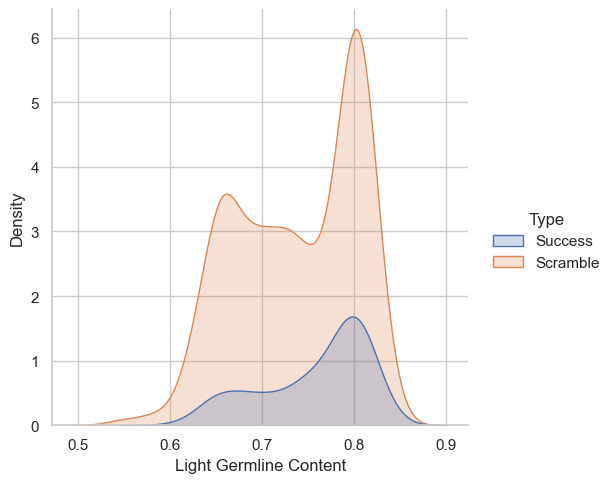

In [27]:
sns.set(style="whitegrid")
g = sns.displot(combined_report, x="Light Germline Content", hue="Type", kind="kde", fill=True)
plt.show()

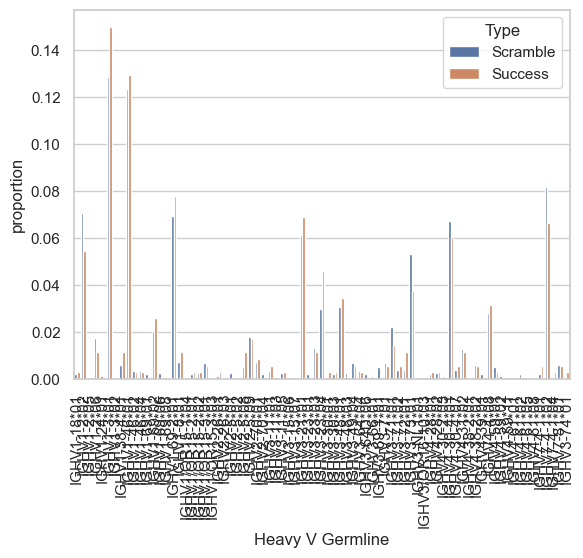

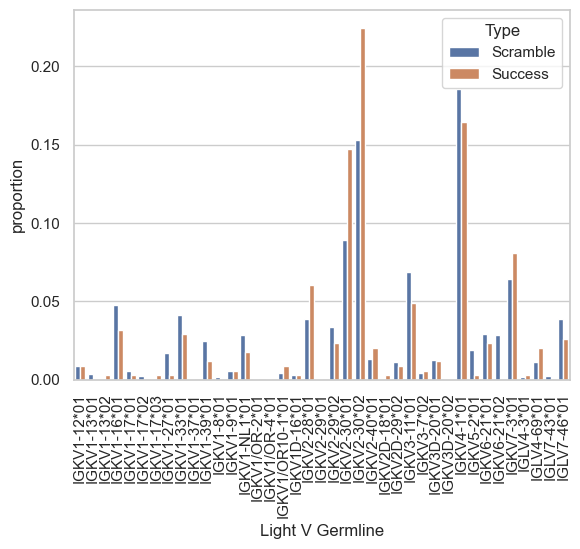

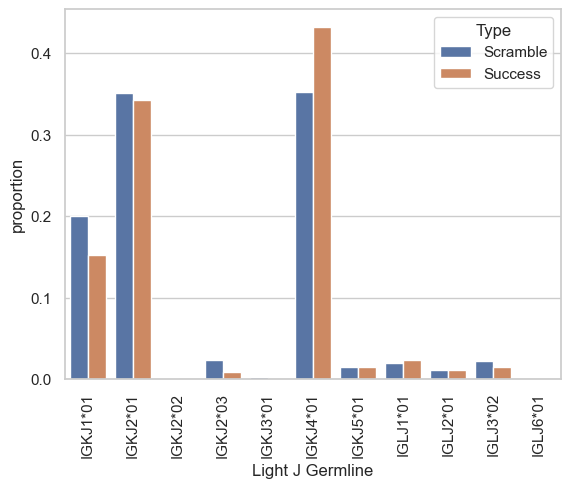

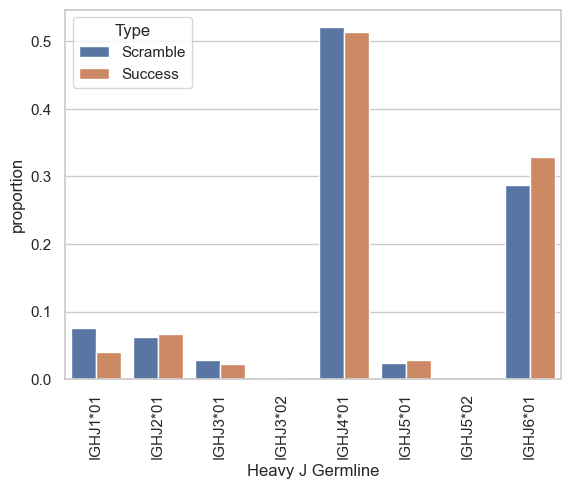

In [47]:
for i in ["Heavy V Germline", "Light V Germline", "Light J Germline", "Heavy J Germline"]:
    grouped = combined_report.groupby(["Type", i]).size().reset_index(name='counts')
    # need the proportion per type
    grouped["proportion"] = grouped["counts"] / grouped.groupby("Type")["counts"].transform("sum")
    sns.set(style="whitegrid")
    g = sns.barplot(x=i, y="proportion", hue="Type", data=grouped)
    # rotate the x labels
    plt.xticks(rotation=90)
    plt.show()

In [73]:
# now try the interaction of Heavy V Germline and Light V Germline and Heavy J Germline and Light J Germline
grouped = combined_report.groupby(["Type", "Heavy V Germline", "Light V Germline"]).size().reset_index(name='counts')
# need the proportion per type
grouped["proportion"] = grouped["counts"] / grouped.groupby("Type")["counts"].transform("sum")
sns.set(style="whitegrid")

# make a new column for the interaction
grouped["interaction"] = grouped["Heavy V Germline"] + " " + grouped["Light V Germline"]
# find the difference between the two types per interaaction (difference in propotions)
grouped = grouped.pivot(index="interaction", columns="Type", values="proportion").reset_index()
# fill in the NaNs with 0
grouped.fillna(0, inplace=True)
grouped["difference"] = grouped["Success"] - grouped["Scramble"]
grouped


Type,interaction,Scramble,Success,difference
0,IGHV1-18*01 IGKV1-33*01,0.000667,0.000000,-0.000667
1,IGHV1-18*01 IGKV2-30*01,0.000000,0.002882,0.002882
2,IGHV1-18*01 IGKV4-1*01,0.000667,0.000000,-0.000667
3,IGHV1-18*01 IGKV6-21*01,0.000667,0.000000,-0.000667
4,IGHV1-2*02 IGKV1-16*01,0.004667,0.000000,-0.004667
...,...,...,...,...
550,IGHV7-81*01 IGKV4-1*01,0.001333,0.000000,-0.001333
551,IGHV7-81*01 IGKV5-2*01,0.000667,0.000000,-0.000667
552,IGHV7-81*01 IGKV6-21*02,0.000667,0.000000,-0.000667
553,IGHV7-81*01 IGKV7-3*01,0.000667,0.000000,-0.000667


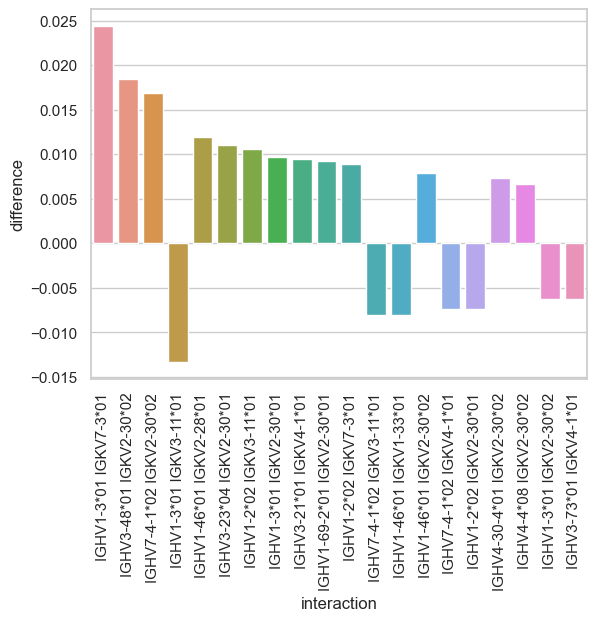

Sum of the absolute differences between success and scramble: 0.20899903938520653


In [74]:
# take just the top 20 differences but baased on absolute value
grouped["abs_difference"] = abs(grouped["difference"])
grouped = grouped.sort_values("abs_difference", ascending=False).head(20)
g = sns.barplot(x="interaction", y="difference", data=grouped) # hue = "Type"
# rotate the x labels
# increase the width of the plot
plt.xticks(rotation=90)
plt.show()
print(f"Sum of the absolute differences between success and scramble: {grouped['abs_difference'].sum()}")

In [65]:
# now try the interaction of Heavy V Germline and Light V Germline and Heavy J Germline and Light J Germline
grouped = combined_report.groupby(["Type", "Heavy J Germline", "Light J Germline"]).size().reset_index(name='counts')
# need the proportion per type
grouped["proportion"] = grouped["counts"] / grouped.groupby("Type")["counts"].transform("sum")
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

# make a new column for the interaction
grouped["interaction"] = grouped["Heavy J Germline"] + " " + grouped["Light J Germline"]
# find the difference between the two types per interaaction (difference in propotions)
grouped = grouped.pivot(index="interaction", columns="Type", values="proportion").reset_index()
# fill in the NaNs with 0
grouped.fillna(0, inplace=True)
grouped["difference"] = grouped["Success"] - grouped["Scramble"]
grouped

Type,interaction,Scramble,Success,difference
0,IGHJ1*01 IGKJ1*01,0.018000,0.011527,-0.006473
1,IGHJ1*01 IGKJ2*01,0.024667,0.008646,-0.016021
2,IGHJ1*01 IGKJ4*01,0.026000,0.020173,-0.005827
3,IGHJ1*01 IGKJ5*01,0.002000,0.000000,-0.002000
4,IGHJ1*01 IGLJ1*01,0.002667,0.000000,-0.002667
5,IGHJ1*01 IGLJ3*02,0.002000,0.000000,-0.002000
6,IGHJ2*01 IGKJ1*01,0.011333,0.005764,-0.005570
7,IGHJ2*01 IGKJ2*01,0.019333,0.023055,0.003721
8,IGHJ2*01 IGKJ2*03,0.000667,0.000000,-0.000667
9,IGHJ2*01 IGKJ4*01,0.024000,0.031700,0.007700


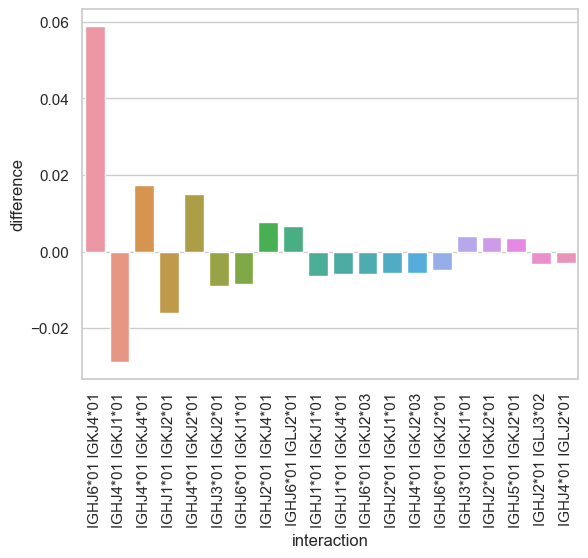

Sum of the absolute differences between success and scramble: 0.22003650336215183


In [67]:
# take just the top 20 differences but baased on absolute value
grouped["abs_difference"] = abs(grouped["difference"])
grouped = grouped.sort_values("abs_difference", ascending=False).head(20)
g = sns.barplot(x="interaction", y="difference", data=grouped) # hue = "Type"
# rotate the x labels
# increase the width of the plot
plt.xticks(rotation=90)
plt.show()
# print the sum of the absolute differences 
print(f"Sum of the absolute differences between success and scramble: {grouped['abs_difference'].sum()}")